In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [74]:
airlines = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airlines

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [75]:
airlines=airlines.rename(columns={'ID#': 'ID','Award?':'Award'})
airlines.set_index('ID',inplace=True)

In [76]:
airlines.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [42]:
airlines.shape

(3999, 11)

In [44]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [45]:
airlines.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [46]:
airlines[airlines.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [9]:
# one row is duplicated 

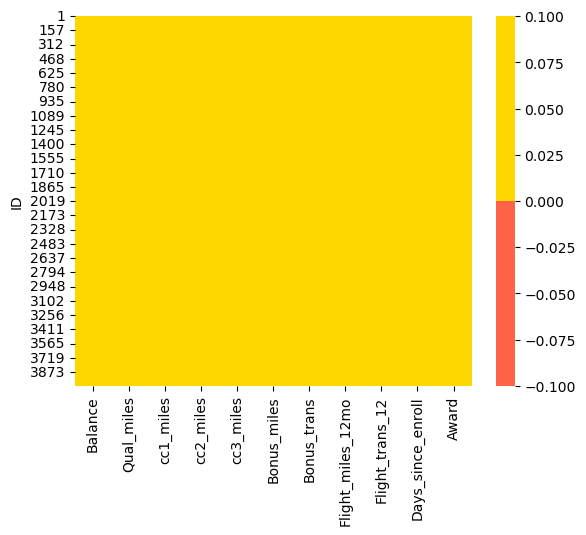

In [47]:
colours = ['#FF6347','#FFD700' ] 
pal = sns.color_palette(colours)
sns.heatmap(airlines.isnull(), cmap=pal)
plt.show()

In [10]:
airlines.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award                   2
dtype: int64

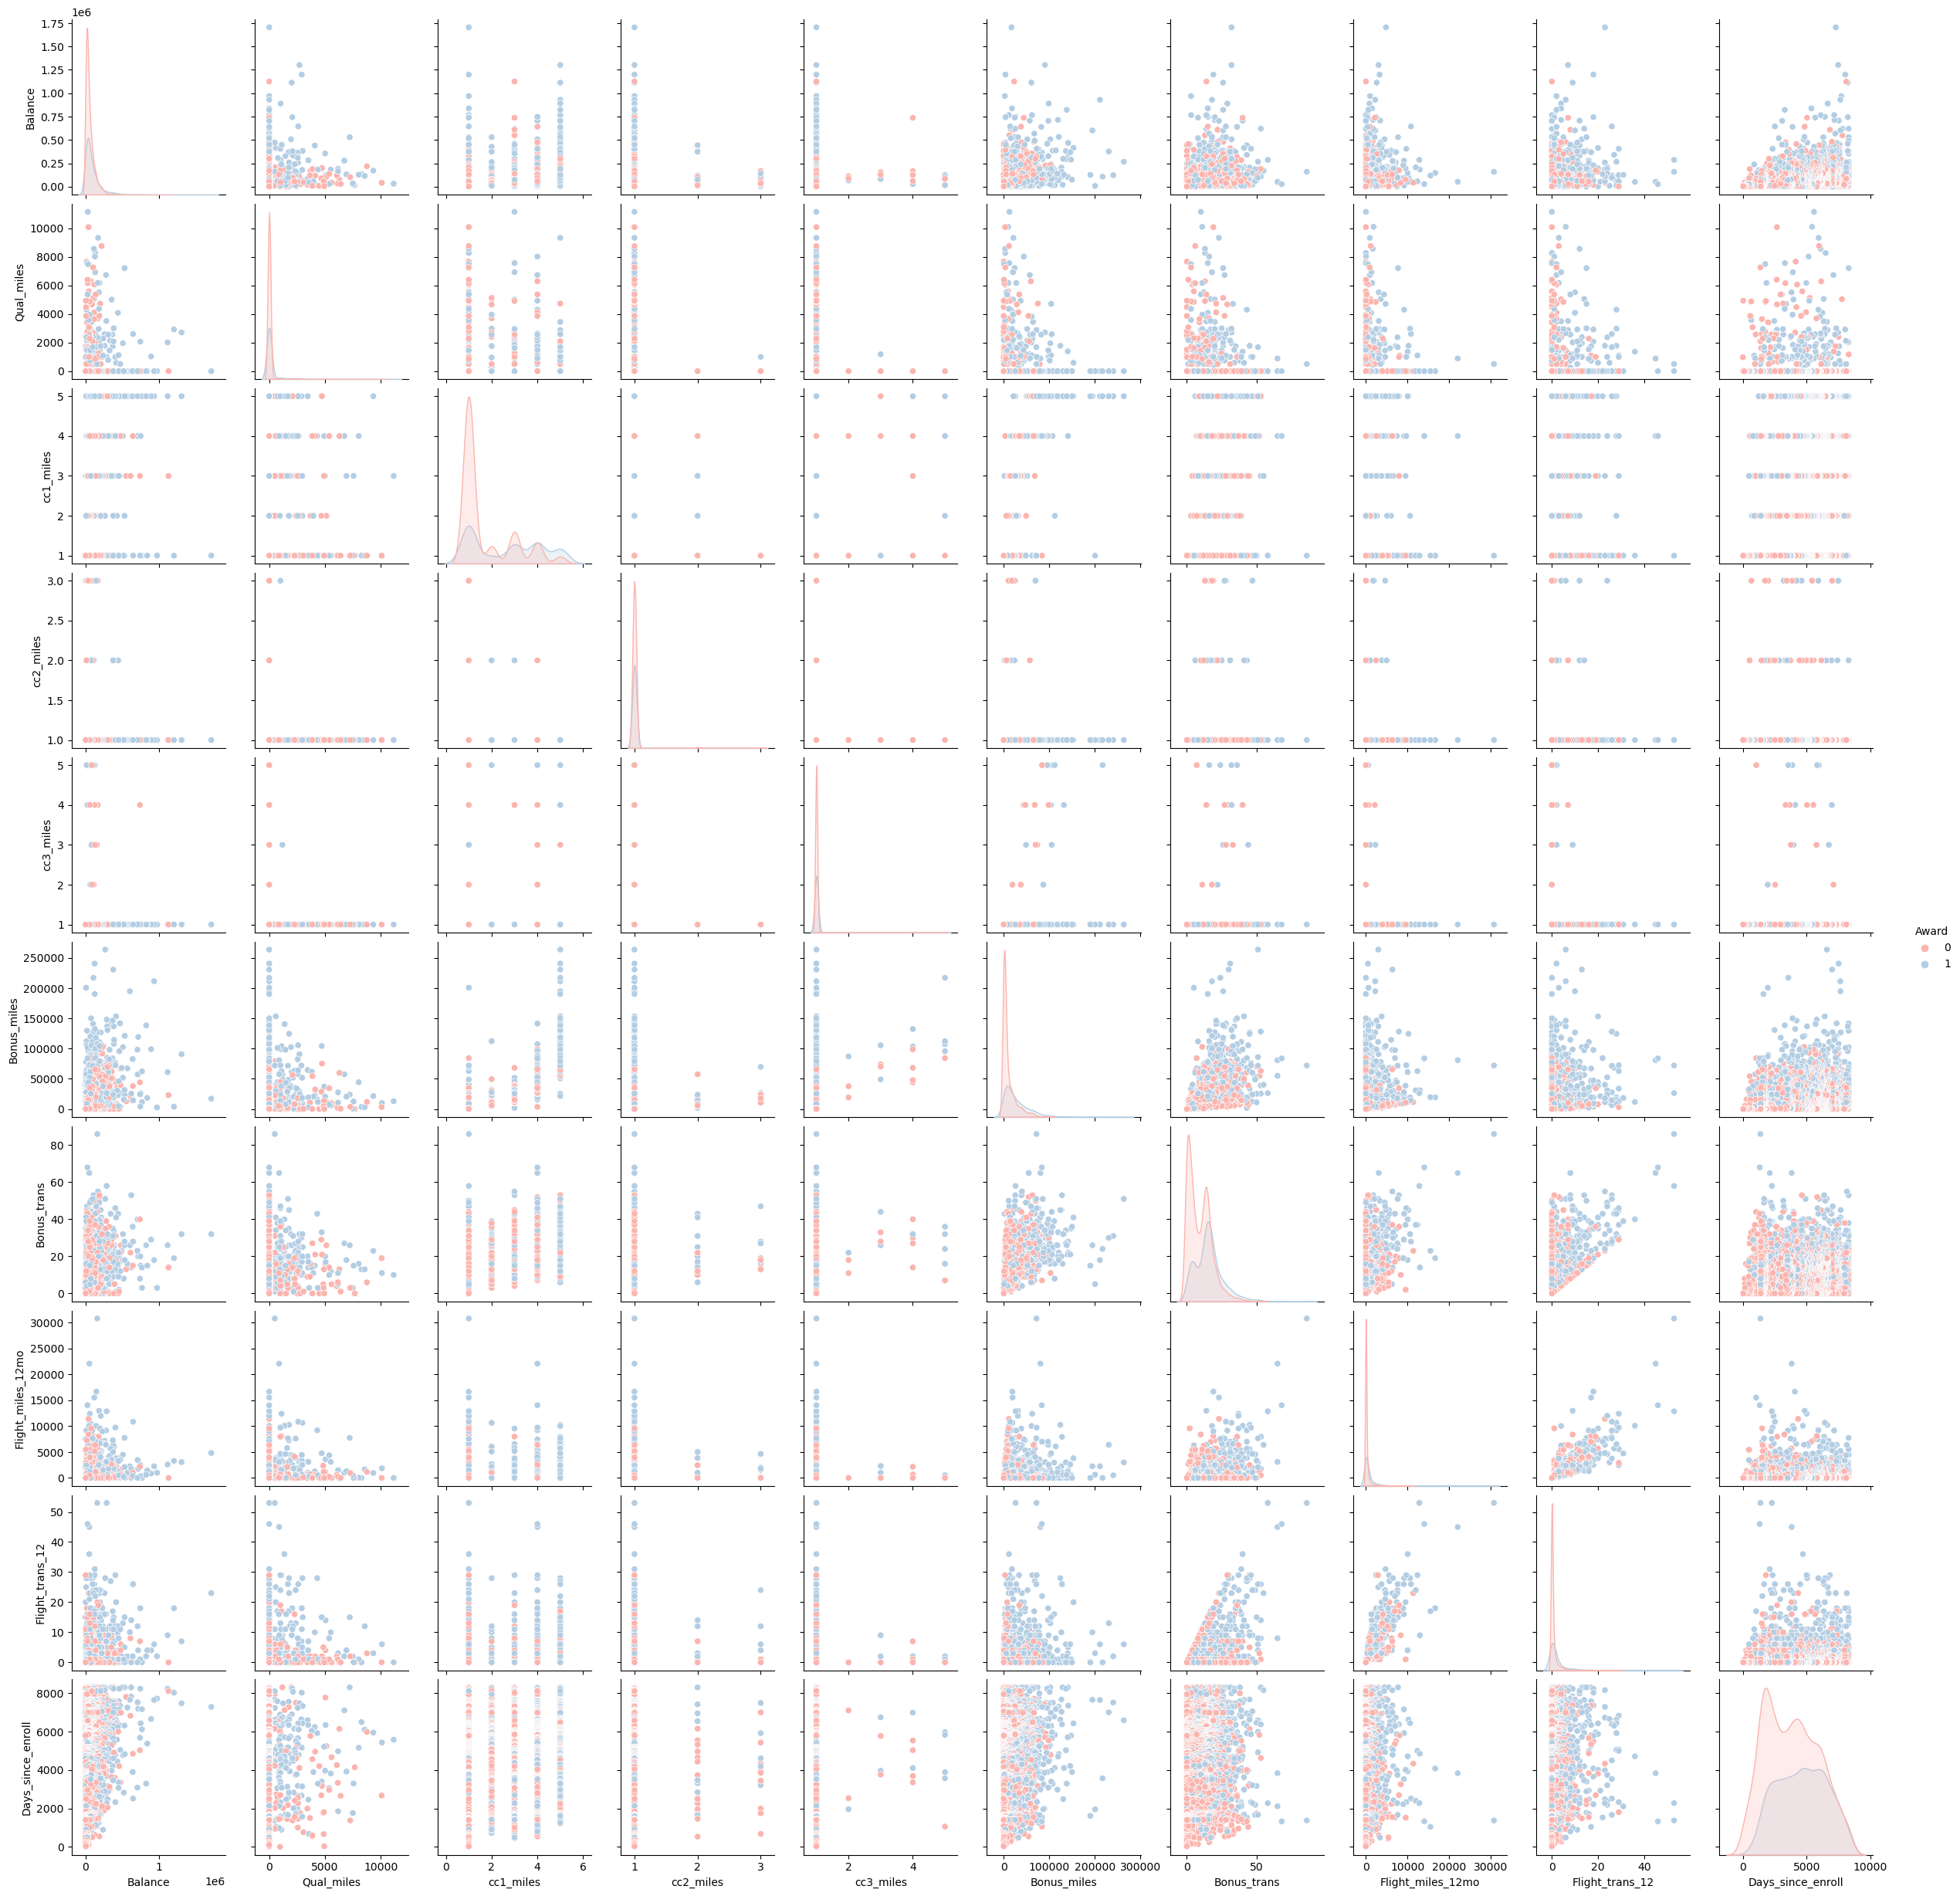

In [48]:
sns.pairplot(airlines,palette='Pastel1', hue='Award')
plt.show()

In [49]:
airlines.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


[]

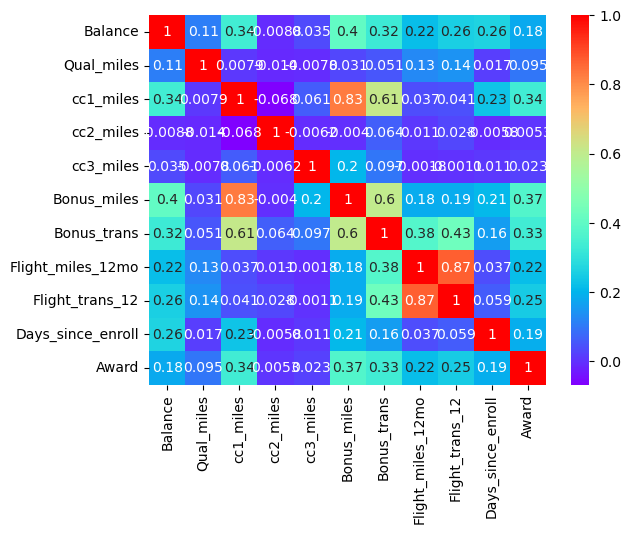

In [50]:
sns.heatmap(airlines.corr(),cmap='rainbow',annot=True)
plt.plot()

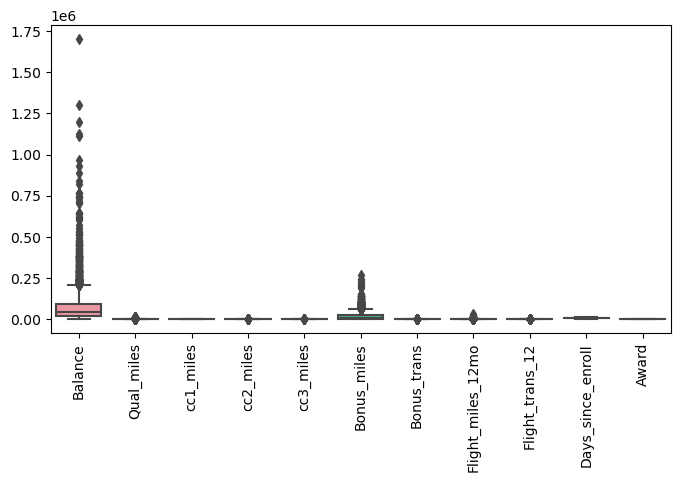

In [51]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = airlines)
plt.xticks(rotation=90)
plt.show()

# Model Diagnostics

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scalar = MinMaxScaler()

In [54]:
scaled_airlines=scalar.fit_transform(airlines)
# Scaled df

In [14]:
pd.DataFrame(scaled_airlines)

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## Hierarchical Clustering

In [55]:
from sklearn.cluster import AgglomerativeClustering

In [56]:
cls = AgglomerativeClustering(n_clusters=4,linkage='average')

In [57]:
cls_pred = cls.fit_predict(scaled_airlines)

In [58]:
scaled_airlines.shape

(3999, 11)

In [59]:
cls_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [77]:
airlines['HAC_labels']=cls_pred
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,HAC_labels
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [60]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_airlines,cls_pred)

0.5286018409871408

In [61]:
import scipy.cluster.hierarchy as sch

In [62]:
sch.linkage(scaled_airlines,method='average',optimal_ordering=False)

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.70400000e+03, 3.72900000e+03, 2.99211023e-04, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 3.07899725e-04, 2.00000000e+00],
       ...,
       [7.99100000e+03, 7.99300000e+03, 1.21686304e+00, 3.99400000e+03],
       [2.75000000e+02, 7.99400000e+03, 1.47970969e+00, 3.99500000e+03],
       [7.98500000e+03, 7.99500000e+03, 1.67257446e+00, 3.99900000e+03]])

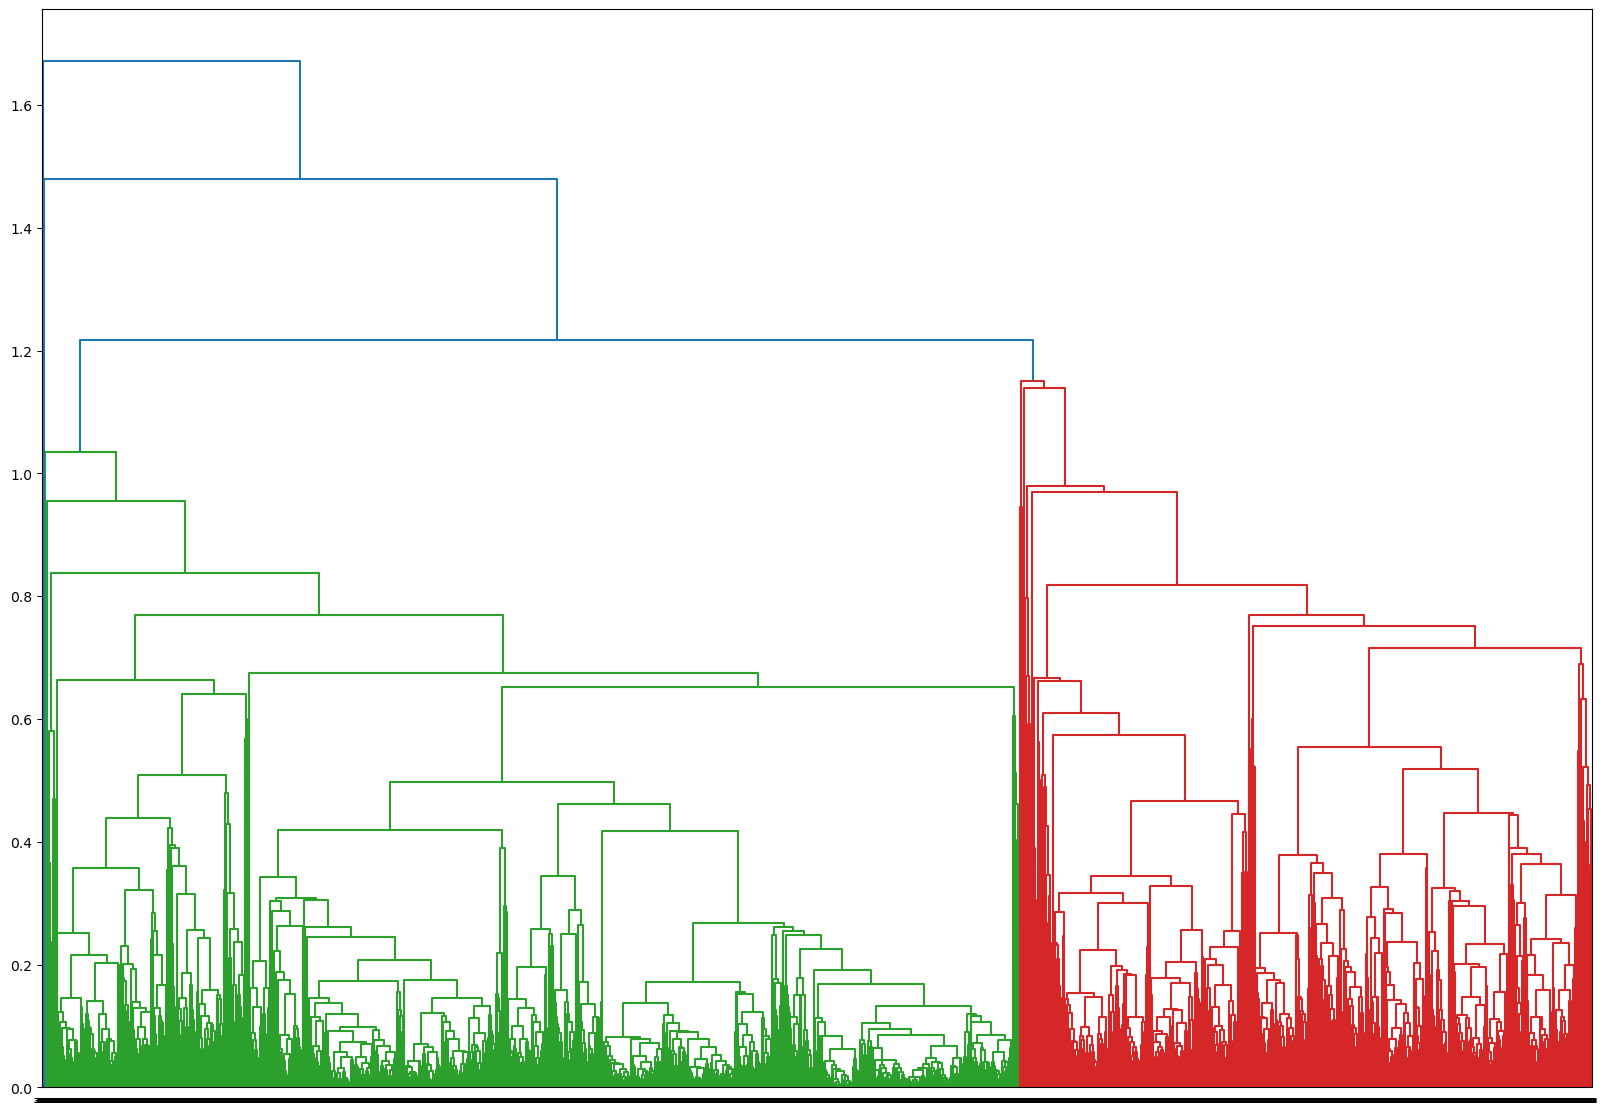

In [63]:
plt.figure(figsize=(20,14))
sch.dendrogram(sch.linkage(scaled_airlines,method='average',optimal_ordering=False,metric='Euclidean'),leaf_rotation = 0,  leaf_font_size = 5)
plt.show()

## KMeans

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss = []
for i in range(1,15):
    km = KMeans(i,random_state=42)
    km_pred = km.fit_predict(scaled_airlines)
    wcss.append(km.inertia_)

In [67]:
model_fin=KMeans(n_clusters=4,random_state=42)
model_fin.fit(scaled_airlines)

KMeans(n_clusters=4, random_state=42)

In [69]:
model_fin.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [26]:
silhouette_score(scaled_airlines,km_pred)

0.3535248712906571

In [84]:
airlines['KMeans_labels']=model_fin.labels_


In [85]:
airlines

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,HAC_labels,Cluster_lables,DBCluster_lables,KMeans_labels
ID,,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1,2
4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1,2
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1,1


KM_grp=airlines.groupby(['KMeans_labels'])
KM_grp.agg('mean')

In [27]:
wcss

[1830.7932128584114,
 823.6756984125207,
 625.1684881570721,
 436.7088576193263,
 348.9433217254137,
 315.3155964842891,
 287.7310054422425,
 263.2132188914899,
 245.4061707045835,
 226.10812108252125,
 214.8393502059138,
 206.46790901305314,
 195.86036463695038,
 190.06536500679093]

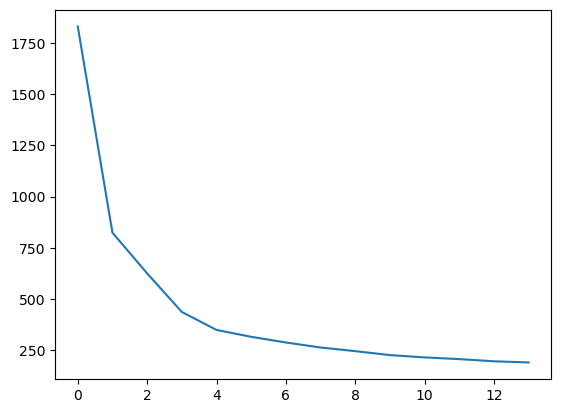

In [28]:
plt.plot(wcss)

# DBSCAN

In [29]:
from sklearn.cluster import DBSCAN

In [96]:
db = DBSCAN(eps=0.5,min_samples=5)

In [97]:
db_pred = db.fit(scaled_airlines)

In [98]:
labels = db_pred.labels_

In [99]:
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [100]:
silhouette_score(scaled_airlines,db.fit_predict(scaled_airlines))

0.24338879565909566

In [101]:
airlines_cluster = pd.DataFrame(airlines)
airlines_cluster['DBCluster_lables'] = labels

In [103]:
airlines_cluster['DBCluster_lables'].unique()

array([ 0,  1,  2, -1,  5,  3,  6,  4], dtype=int64)

In [82]:
airlines_cluster.tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,HAC_labels,Cluster_lables,DBCluster_lables
ID,,,,,,,,,,,,,,
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,1
4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0
4021,3016,0,1,1,1,0,0,0,0,1398,0,1,0,0


In [37]:
airlines_cluster.groupby(airlines_cluster['Cluster_lables']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
Cluster_lables,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


KMeans- From the above table , it is clear that it has k clusters=4 .... and based on that it has been divide into 4 clusters.

Hirearchichal- Similar to KMeans it has been divided into 4 clusters as 0,1, and 2,3 .... but cluster points are different compared to KMeans.

DBSCAN- Based on the data , its eps and min_samples , model has predicted points on basis of -1(noise points),0(core points),1(border points) and 2,3,4&5 (others)